In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("MilkQualityC.csv")
print(data.index)

RangeIndex(start=0, stop=1059, step=1)


In [4]:
print(data.columns)
print(data.shape)
data.info()

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour',
       'Chance'],
      dtype='object')
(1059, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Chance      1059 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 66.3 KB


In [5]:
print(data.head())

    pH  Temprature  Taste  Odor  Fat  Turbidity  Colour  Chance
0  6.6          35      1     0    1          0     254    0.99
1  6.6          36      0     1    0          1     253    0.99
2  8.5          70      1     1    1          1     246    0.33
3  9.5          34      1     1    0          1     255    0.33
4  6.6          37      0     0    0          0     255    0.66


In [6]:
print(data.tail())

       pH  Temprature  Taste  Odor  Fat  Turbidity  Colour  Chance
1054  6.7          45      1     1    0          0     247    0.66
1055  6.7          38      1     0    1          0     255    0.99
1056  3.0          40      1     1    1          1     255    0.33
1057  6.8          43      1     0    1          0     250    0.99
1058  8.6          55      0     1    1          1     255    0.33


In [7]:
data.nunique()

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Chance         3
dtype: int64

In [8]:
data.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Chance        0
dtype: int64

In [9]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Chance        0
dtype: int64

In [10]:
print(data.describe())

                pH   Temprature        Taste         Odor          Fat  \
count  1059.000000  1059.000000  1059.000000  1059.000000  1059.000000   
mean      6.630123    44.226629     0.546742     0.432483     0.671388   
std       1.399679    10.098364     0.498046     0.495655     0.469930   
min       3.000000    34.000000     0.000000     0.000000     0.000000   
25%       6.500000    38.000000     0.000000     0.000000     0.000000   
50%       6.700000    41.000000     1.000000     0.000000     1.000000   
75%       6.800000    45.000000     1.000000     1.000000     1.000000   
max       9.500000    90.000000     1.000000     1.000000     1.000000   

         Turbidity       Colour       Chance  
count  1059.000000  1059.000000  1059.000000  
mean      0.491029   251.840415     0.606091  
std       0.500156     4.307424     0.259996  
min       0.000000   240.000000     0.330000  
25%       0.000000   250.000000     0.330000  
50%       0.000000   255.000000     0.660000  
75% 

In [11]:
print(data.dtypes)

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Chance        float64
dtype: object


In [12]:
feature_col = ['pH','Temprature','Taste','Odor','Fat',
                 'Turbidity','Colour']
X = data[feature_col]

data['Chance'] = np.where(data['Chance'] >= 0.9,1,0)
print(data['Chance'].head())
Y = data['Chance']

0    1
1    1
2    0
3    0
4    0
Name: Chance, dtype: int32


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
Y_train_pred = clf.predict(x_train)

print("Training Accuracy:", metrics.accuracy_score(y_train, Y_train_pred))
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

clf1 = DecisionTreeClassifier()
clf1.fit(x_train, y_train)
print(cross_val_score(clf1, x_train, y_train, cv=10, scoring='accuracy').mean())
y_pred = clf1.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.9968553459119497
0.9932432432432432
Accuracy: 0.9968553459119497


[Text(108.42954545454546, 205.35999999999999, 'X[4] <= 0.5\ngini = 0.377\nsamples = 741\nvalue = [554, 187]'),
 Text(45.654545454545456, 181.2, 'X[1] <= 36.5\ngini = 0.008\nsamples = 239\nvalue = [238, 1]'),
 Text(30.436363636363637, 157.04, 'X[1] <= 35.0\ngini = 0.05\nsamples = 39\nvalue = [38, 1]'),
 Text(15.218181818181819, 132.88, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(45.654545454545456, 132.88, 'X[6] <= 250.0\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(30.436363636363637, 108.72, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(60.872727272727275, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(60.872727272727275, 157.04, 'gini = 0.0\nsamples = 200\nvalue = [200, 0]'),
 Text(171.20454545454547, 181.2, 'X[0] <= 6.55\ngini = 0.466\nsamples = 502\nvalue = [316, 186]'),
 Text(91.30909090909091, 157.04, 'X[0] <= 6.05\ngini = 0.164\nsamples = 177\nvalue = [161, 16]'),
 Text(76.0909090909091, 132.88, 'gini = 0.0\nsamples = 111\nvalue = [111, 0]'),
 Te

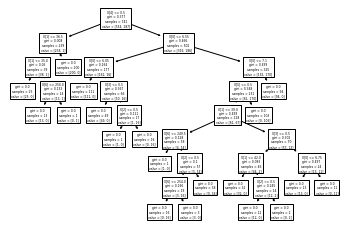

In [14]:
from sklearn import tree
tree.plot_tree(clf)

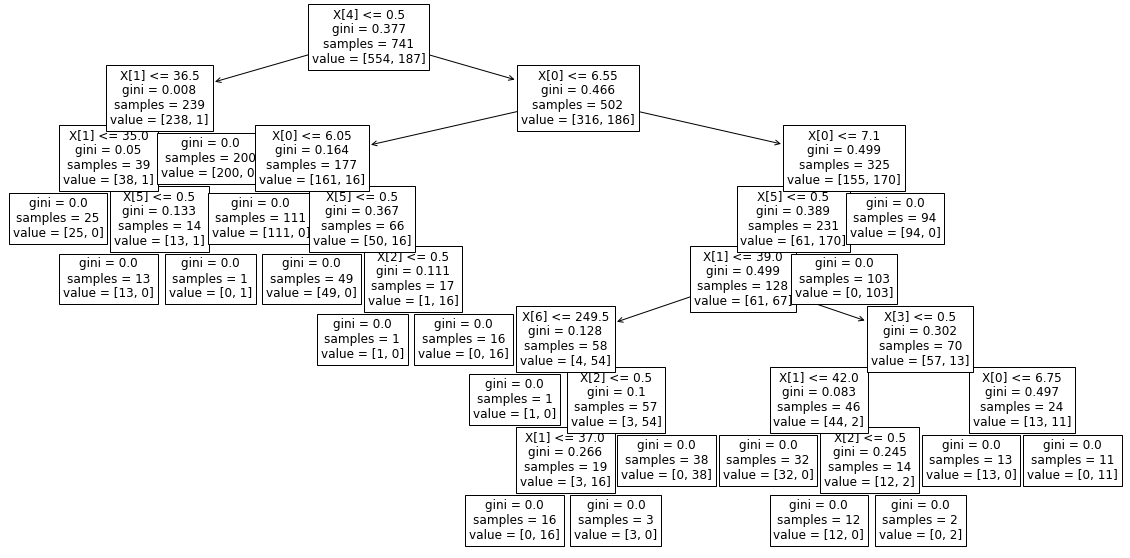

In [15]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf1, fontsize=12)
plt.show()

In [16]:
from sklearn.tree import export_graphviz

In [17]:
!pip install graphviz

In [18]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [21]:
conda install python-graphviz


Note: you may need to restart the kernel to use updated packages.



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python-graphviz-0.20.1     |   py39haa95532_0          63 KB
    ------------------------------------------------------------
                                           Total:          63 KB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  python-graphviz    pkgs/main/win-64::python-graphviz-0.20.1-py39haa95532_0

The following packages will be UPDATED:

  conda                               4.10.3-py39

In [19]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [20]:
dot_data = StringIO()
data1 = export_graphviz(decision_tree=clf1, out_file=None, feature_names=feature_col)

graph = pydotplus.graph_from_dot_data(data1)
graph.write_png('qualityf.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [21]:
data = tree.export_graphviz(clf, out_file=None, feature_names=feature_col)
graph = pydotplus.graph_from_dot_data(data) 
graph.write_png('mydecisiontree.png')
img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

InvocationException: GraphViz's executables not found